<a href="https://colab.research.google.com/github/HuyNguyen271/Bai_tap_tuan_01/blob/main/Prediction_of_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5789c4a9d6ab95592afa5bbc857c95843c3c102a7cf2f47694634441e8293187
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


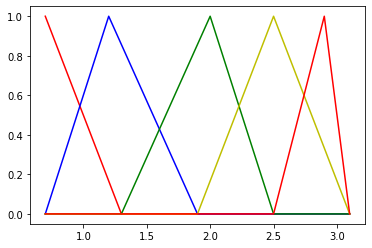

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(0.7,3.1,0.1)

vl=fuzz.trimf(x,[0.7,0.7,1.3])
l=fuzz.trimf(x,[0.7,1.2,1.9])
n=fuzz.trimf(x,[1.3,2,2.5])
h=fuzz.trimf(x,[1.9,2.5,3.1])
vh=fuzz.trimf(x,[2.5,2.9,3.1])

plt.figure()
plt.plot(x,vl,'r',linewidth=1.5,label='Very Low')
plt.plot(x,l,'b',linewidth=1.5,label='Low')
plt.plot(x,n,'g',linewidth=1.5,label='Normal')
plt.plot(x,h,'y',linewidth=1.5,label='High')
plt.plot(x,vh,'r',linewidth=1.5,label='Very High')

plt.show()

2.9835776271922567


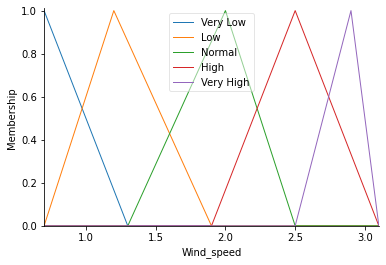

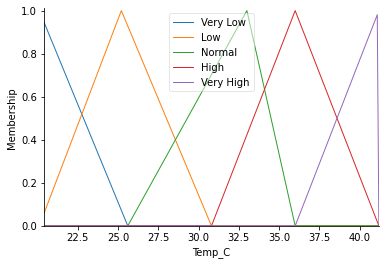

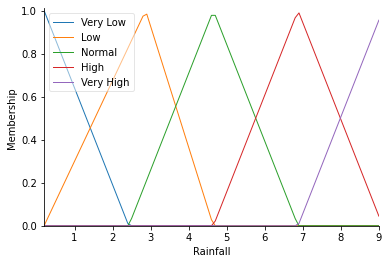

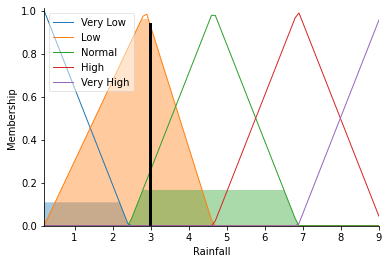

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
# Tao khoang data
ws = ctrl.Antecedent(np.arange(0.7,3.1,0.1),'Wind_speed') # m/s input khoang dau vao
tp = ctrl.Antecedent(np.arange(20.4,41.2,0.1),'Temp_C')   #*C
rf = ctrl.Consequent(np.arange(0.2,9.1,0.1),'Rainfall') # output khoang dau ra




#ws
ws['Very Low']=fuzz.trimf(ws.universe,[0.7,0.7,1.3])  
ws['Low']=fuzz.trimf(ws.universe,[0.7,1.2,1.9])  
ws['Normal']=fuzz.trimf(ws.universe,[1.3,2,2.5])  
ws['High']=fuzz.trimf(ws.universe,[1.9,2.5,3.1])  
ws['Very High']=fuzz.trimf(ws.universe,[2.5,2.9,3.1])      


#tp
tp['Very Low']=fuzz.trimf(tp.universe,[20.1,20.1,25.6])  
tp['Low']=fuzz.trimf(tp.universe,[20.1,25.2,30.8])  
tp['Normal']=fuzz.trimf(tp.universe,[25.6,33,36])  
tp['High']=fuzz.trimf(tp.universe,[30.8,36,41.2])  
tp['Very High']=fuzz.trimf(tp.universe,[36,41.2,41.2])  

#rf
rf['Very Low']=fuzz.trimf(rf.universe,[0.2,0.2,2.425])  
rf['Low']=fuzz.trimf(rf.universe,[0.2,2.87,4.65])  
rf['Normal']=fuzz.trimf(rf.universe,[2.425,4.65,6.875])  
rf['High']=fuzz.trimf(rf.universe,[4.65,6.875,9.1])  
rf['Very High']=fuzz.trimf(rf.universe,[6.875,9.1,9.1])  

# tao luat
rule1 =ctrl.Rule(ws['Very Low'] & tp['Very Low'],rf['Very Low'])
rule2 =ctrl.Rule(ws['Very Low'] & tp['Low'],rf['Very Low'])
rule3 =ctrl.Rule(ws['Very Low'] & tp['Normal'],rf['Very Low'])
rule4 =ctrl.Rule(ws['Very Low'] & tp['High'],rf['Low'])
rule5 =ctrl.Rule(ws['Very Low'] & tp['Very High'],rf['Normal']) 

rule6 =ctrl.Rule(ws['Low'] & tp['Very Low'],rf['Very Low'])
rule7 =ctrl.Rule(ws['Low'] & tp['Low'],rf['Very Low'])
rule8 =ctrl.Rule(ws['Low'] & tp['Normal'],rf['Low'])
rule9 =ctrl.Rule(ws['Low'] & tp['High'],rf['Low'])
rule10 =ctrl.Rule(ws['Low'] & tp['Very High'],rf['Normal']) 

rule11 =ctrl.Rule(ws['Normal'] & tp['Very Low'],rf['Very Low'])
rule12 =ctrl.Rule(ws['Normal'] & tp['Low'],rf['Low'])
rule13 =ctrl.Rule(ws['Normal'] & tp['Normal'],rf['Normal'])
rule14 =ctrl.Rule(ws['Normal'] & tp['High'],rf['Normal'])
rule15 =ctrl.Rule(ws['Normal'] & tp['Very High'],rf['High']) 

rule16 =ctrl.Rule(ws['High'] & tp['Very Low'],rf['Low'])
rule17 =ctrl.Rule(ws['High'] & tp['Low'],rf['Normal'])
rule18 =ctrl.Rule(ws['High'] & tp['Normal'],rf['Normal'])
rule19 =ctrl.Rule(ws['High'] & tp['High'],rf['High'])
rule20 =ctrl.Rule(ws['High'] & tp['Very High'],rf['High']) 

rule21 =ctrl.Rule(ws['Very High'] & tp['Very Low'],rf['Normal'])
rule22 =ctrl.Rule(ws['Very High'] & tp['Low'],rf['High'])
rule23 =ctrl.Rule(ws['Very High'] & tp['Normal'],rf['High'])
rule24 =ctrl.Rule(ws['Very High'] & tp['High'],rf['Very High'])
rule25 =ctrl.Rule(ws['Very High'] & tp['Very High'],rf['Very High']) 


raining_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,
                                   rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,
                                   rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25]) # dua vao 
raining = ctrl.ControlSystemSimulation(raining_ctrl) # mo phong
#input data
raining.input['Wind_speed'] = 2
raining.input['Temp_C'] = 25
raining.compute()

ws.view()
tp.view()
rf.view()

print(raining.output['Rainfall']) #in ra
rf.view(sim=raining) # view maps

